In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df=pd.read_csv('../../data/processed/airport_cleaned.csv')
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,AT,HOUR,MONTH
0,2019-06-01 00:00:00,8.968447,12.179626,0.373962,13.710286,6.367238,17.086000,58.661489,59.723048,16.579524,76.262476,4.171932,21.877100,87.716774,1.227097,184.529677,27.810215,0,6
1,2019-06-01 01:00:00,9.016863,11.966923,0.349231,13.906923,5.444466,16.093861,51.717188,59.477379,15.399406,74.491359,4.104333,21.602857,87.869348,1.153152,187.873913,27.744130,1,6
2,2019-06-01 02:00:00,9.504804,12.471415,0.305619,13.750286,4.365825,15.659320,54.967634,56.430673,14.609010,70.510865,4.089186,21.700000,88.223226,1.124731,181.798710,27.602903,2,6
3,2019-06-01 03:00:00,9.895050,12.776481,0.294231,14.580286,2.354608,15.780962,53.554946,56.006408,13.140686,68.903107,4.638222,23.246042,88.747065,1.141848,176.929457,27.411304,3,6
4,2019-06-01 04:00:00,10.109903,13.154128,0.298302,14.143962,4.111058,14.980377,53.374362,58.782404,13.335400,71.507692,4.162989,21.476224,88.678602,1.128280,173.737204,27.353011,4,6


# **LinearRegression** 

In [3]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [4]:
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'O',
 'HOUR',
 'WS',
 'WD',
 'AT']
col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 

In [5]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (23685, 2)
Test data size: (10152, 2)


In [6]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [7]:
print('Intercept:',lr_model.intercept_)
# represents the expected value of the target variable when all predictor variables are equal to zero
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))
#  the coefficient value represents the slope of the line that best fits the relationship 
# between a predictor variable and the target variable. Specifically, the coefficient value 
# indicates the change in the expected value of the target variable for a one-unit change in 
# the corresponding predictor variable, holding all other predictor variables constant.

Intercept: 10.19563446968117
--------------------------------
Slope:


[('NH3', 0.7225764272921138), ('NO', 1.0910581956221739)]

In [8]:
y_pred=lr_model.predict(X_test)                      #predict using the model
x_pred=lr_model.predict(X_train)                      #predict using the model
lrRmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('RMSE of predicted PM2.5 in LR model:',lrRmse)

RMSE of predicted PM2.5 in LR model: 7.308491841768325


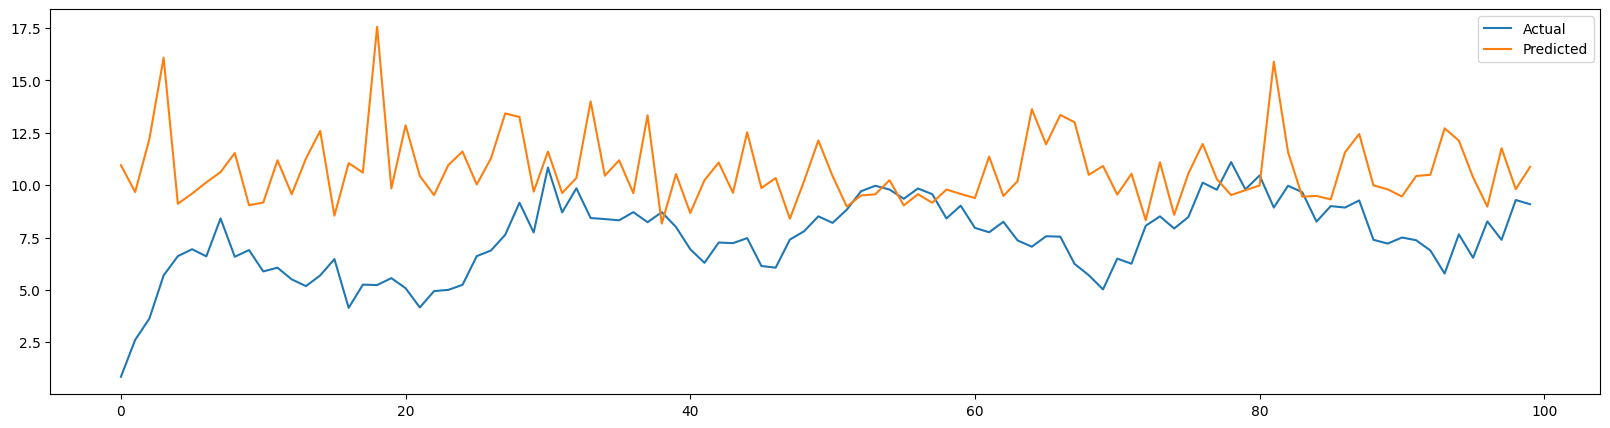

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred, y_pred])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Random Forest**

In [10]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   
from sklearn.ensemble import RandomForestRegressor           

col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)           
y_pred_rf=rf_model.predict(X_test)   
x_pred_rf=rf_model.predict(X_train)   
RF_rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))      
print('RMSE of predicted PM2.5 in RF model:',RF_rmse)

Training data size: (23685, 2)
Test data size: (10152, 2)
RMSE of predicted PM2.5 in RF model: 7.656664173032976


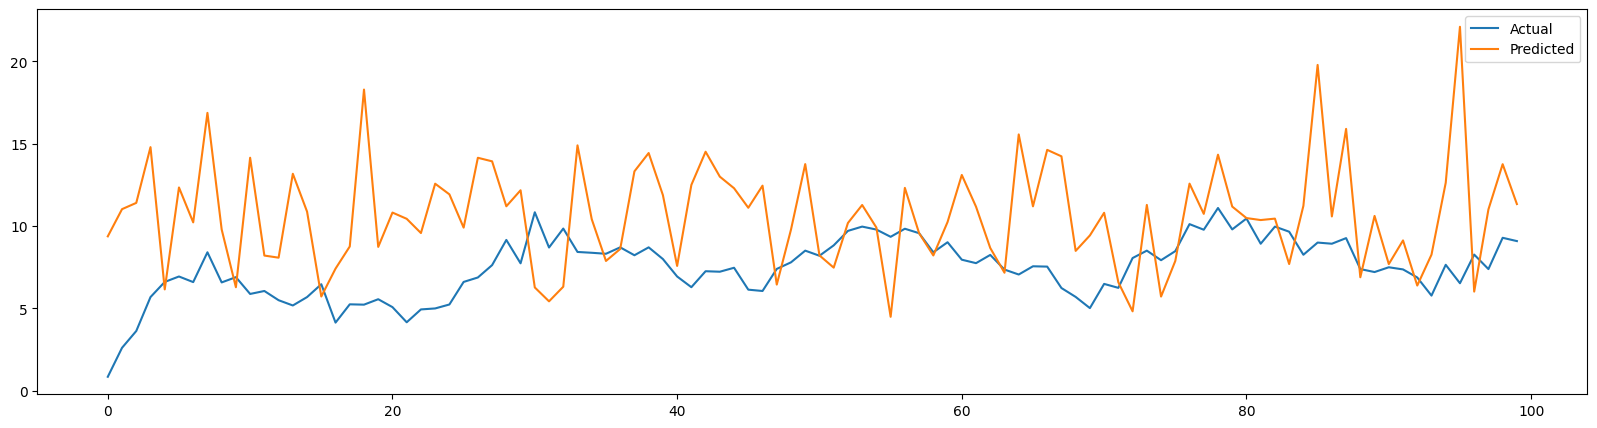

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_rf, y_pred_rf])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeRegressor
col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)
y_pred_dtone=dt_model.predict(X_test)
x_pred_dtone=dt_model.predict(X_train)
DT_rmse=np.sqrt(mean_squared_error(y_test,y_pred_dtone))
print('RMSE of predicted PM2.5 in DT model:',DT_rmse)

Training data size: (23685, 2)
Test data size: (10152, 2)
RMSE of predicted PM2.5 in DT model: 9.745276980725167


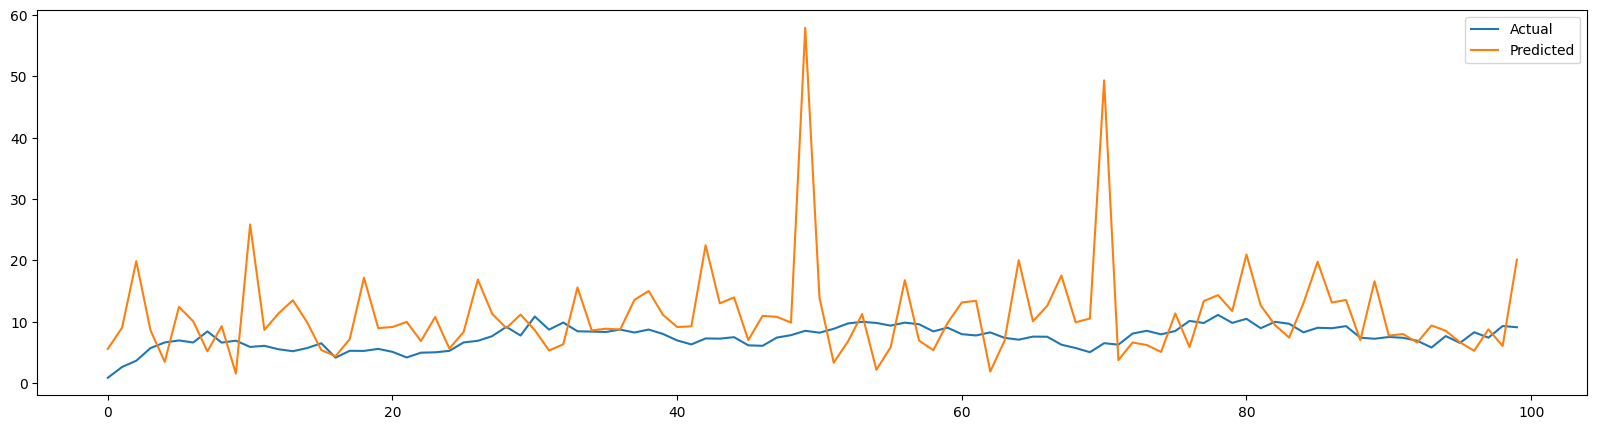

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_dtone, y_pred_dtone])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **SVM model**

In [14]:
from sklearn.svm import SVR
col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
sv_reg=SVR()
sv_model=sv_reg.fit(X_train,y_train) 
y_pred_sv=sv_model.predict(X_test) 
x_pred_sv=sv_model.predict(X_train) 
SV_rmse=np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of predicted PM2.5 in SVM model:',SV_rmse)

Training data size: (23685, 2)
Test data size: (10152, 2)
RMSE of predicted PM2.5 in SVM model: 7.303374602529911


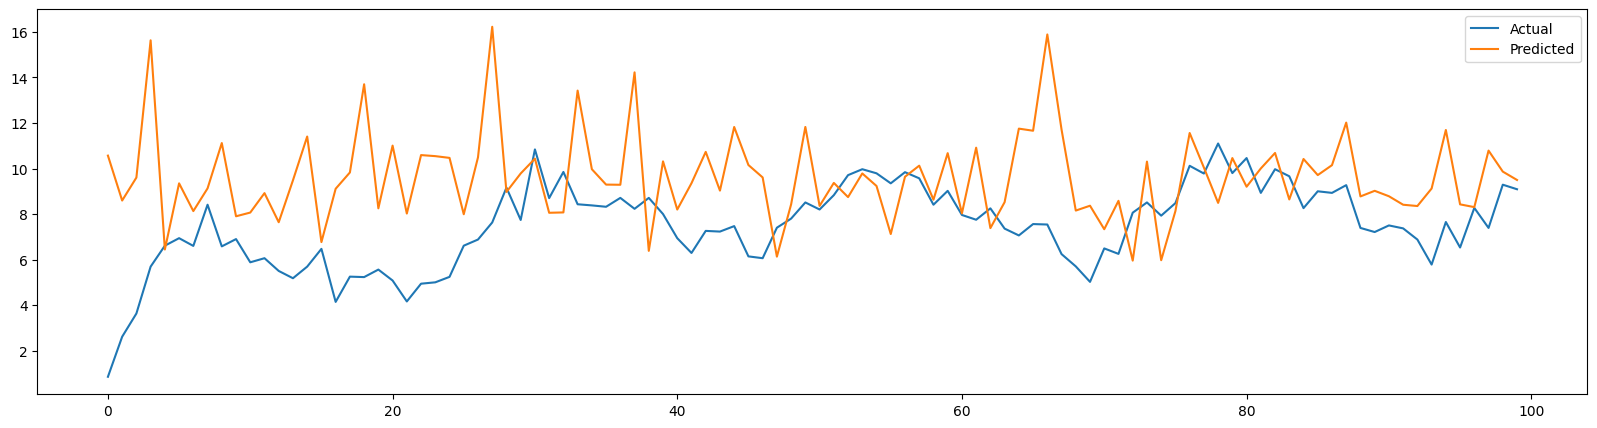

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_sv, y_pred_sv])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **LSTM model**

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
n_steps = 1
n_features = X_train.shape[1]
X_train_lstm = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.reshape((X_test.shape[0], n_steps, n_features))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse') 

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_lstm = lstm_model.predict(X_test_lstm)
x_pred_lstm = lstm_model.predict(X_train_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print('Training data size:', X_train_lstm.shape)
print('Test data size:', X_test_lstm.shape)
print('RMSE of predicted PM2.5 in LSTM model:', lstm_rmse)


741/741 [==============================] - 2s 3ms/step
Training data size: (23685, 1, 2)
Test data size: (10152, 1, 2)
RMSE of predicted PM2.5 in LSTM model: 7.260276874080273


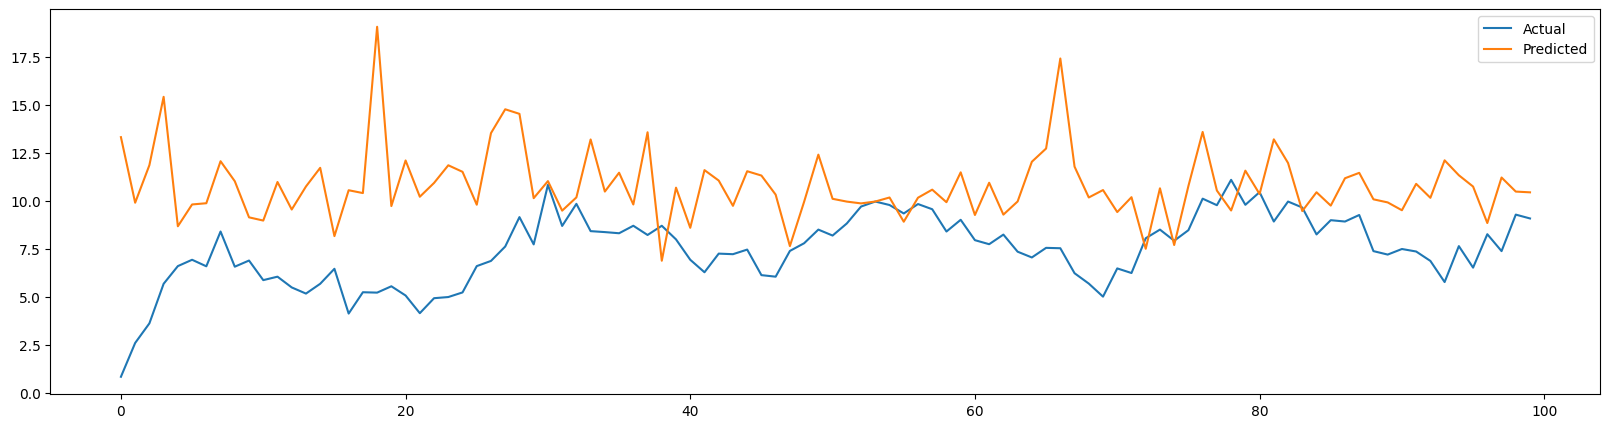

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_lstm, y_pred_lstm])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Gradient boosting**

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
col_=['NH3','NO','SO2']
X=df[col_].drop('SO2',axis=1)     #X-input features
y=df['SO2']                    #y-input features 
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
gb_reg = GradientBoostingRegressor()
gb_model = gb_reg.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
x_pred_gb = gb_model.predict(X_train)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)
GB_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('RMSE of predicted PM2.5 in gradient boosting model:', GB_rmse)

Training data size: (23685, 2)
Test data size: (10152, 2)
RMSE of predicted PM2.5 in gradient boosting model: 7.146088596867369


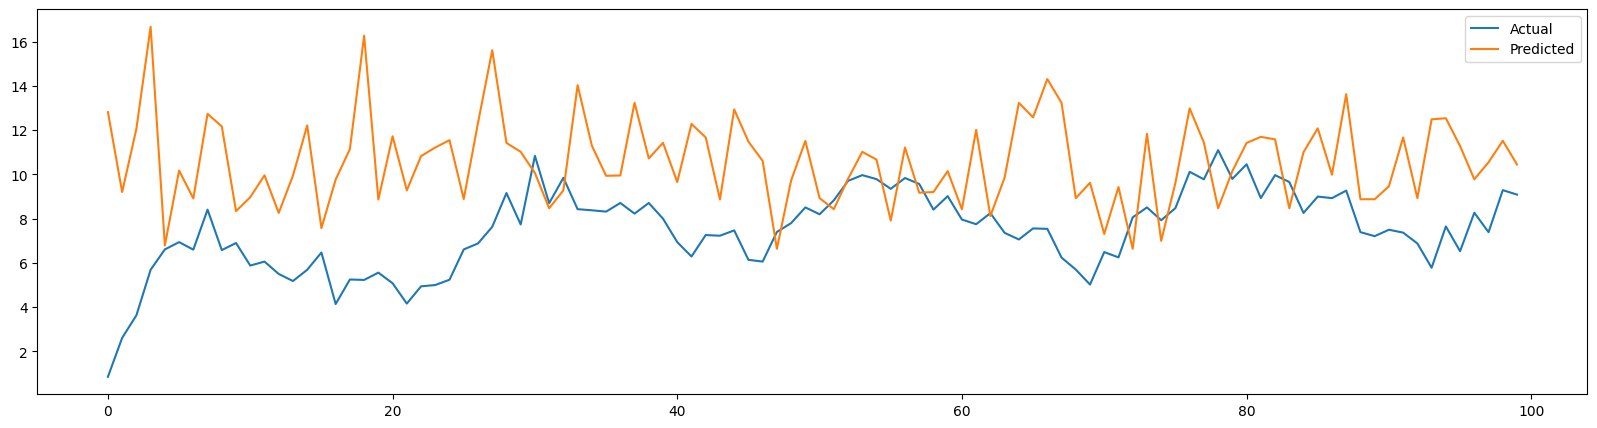

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['SO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_gb, y_pred_gb])[30500:30600], label='Predicted')
plt.legend()
plt.show()